
# Exploratory Data Analysis on Metro Stations

This notebook performs EDA on metro station data to understand:
- The spatial distribution of metro stations.
- Clustering patterns to identify key metro areas.
- Insights to improve transportation systems.

The dataset includes location information for each metro station, allowing for clustering and visualization.

In [1]:

%pip install seaborn
%pip install numpy
%pip install pandas
%pip install matplotlib
%matplotlib inline
%pip install geopy
%pip install folium

In [1]:
# Import libraries for data analysis and visualization
import pandas as pd

# Load the dataset
file_path = '/content/MadridMetro_structured_data.csv'
metro_dataset = pd.read_csv(file_path, encoding='UTF-8')

# Display the first few rows to inspect the data
print(metro_dataset.head())



   StationName   Latitude  Longitude line_name metroTraffic_2021  \
0     Tribunal  40.426133  -3.701162   Linea 1        13.521.895   
1       Retiro  40.420737  -3.685877   Linea 2         3.612.177   
2          Sol  40.416868  -3.702793   Linea 2        49.567.085   
3      Serrano  40.425412  -3.686607   Linea 4         3.148.887   
4  El capricho  40.453297  -3.594266   Linea 5           943.938   

  Entertainment_Attraction                    Health_Attraction  \
0   Museo del Romanticismo  Hospital Nuestra Señora del Rosario   
1         Puerta de Alcalá          Angloamericana Medical Unit   
2              plaza Mayor                         Clinícas Pol   
3            Museo de Cera  Hospital Nuestra Señora del Rosario   
4       Jardin El Capricho                        Clínica Suiza   

                 Education_Attraction  Entertainment_Distance(m)  \
0                   Wild Code School                         350   
1              Midleton School Madrid               

In [2]:
# General information
print(metro_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StationName                         12 non-null     object 
 1   Latitude                            12 non-null     float64
 2   Longitude                           12 non-null     float64
 3   line_name                           12 non-null     object 
 4   metroTraffic_2021                   12 non-null     object 
 5   Entertainment_Attraction            12 non-null     object 
 6   Health_Attraction                   12 non-null     object 
 7   Education_Attraction                12 non-null     object 
 8   Entertainment_Distance(m)           12 non-null     int64  
 9   Health_Distance(m)                  12 non-null     int64  
 10  Education_Distance(m)               12 non-null     int64  
 11  Entertainment_WalkingDuration(min)  12 non-null

In [3]:
# Summary statistics for numerical columns
print(metro_dataset.describe())

        Latitude  Longitude  Entertainment_Distance(m)  Health_Distance(m)  \
count  12.000000  12.000000                  12.000000           12.000000   
mean   40.407395  -3.711784                 401.666667          668.166667   
std     0.052014   0.058865                 258.767475          567.086627   
min    40.296426  -3.837546                  50.000000           66.000000   
25%    40.403464  -3.728892                 207.500000          285.000000   
50%    40.423500  -3.701978                 375.000000          625.000000   
75%    40.444885  -3.686425                 525.000000          925.000000   
max    40.453297  -3.594266                 950.000000         2100.000000   

       Education_Distance(m)  Entertainment_WalkingDuration(min)  \
count                12.0000                           12.000000   
mean                392.5000                            5.750000   
std                 254.1898                            3.360871   
min                  14.0

In [4]:
# Check for missing values
print(metro_dataset.isnull().sum())

StationName                            0
Latitude                               0
Longitude                              0
line_name                              0
metroTraffic_2021                      0
Entertainment_Attraction               0
Health_Attraction                      0
Education_Attraction                   0
Entertainment_Distance(m)              0
Health_Distance(m)                     0
Education_Distance(m)                  0
Entertainment_WalkingDuration(min)     0
Health_WalkingDuration(min)            0
Education_WalkingDuration(min)         0
Entertainment_Latitude                 0
Entertainment_longitude                0
Health_Latitude                        0
Health_longitude                       0
Education_Latitude                     0
Education_longitude                    0
Jan.Morning                            0
Jan.Night                              0
Feb.Morning                            0
Feb.Night                              0
Mar.Morning     

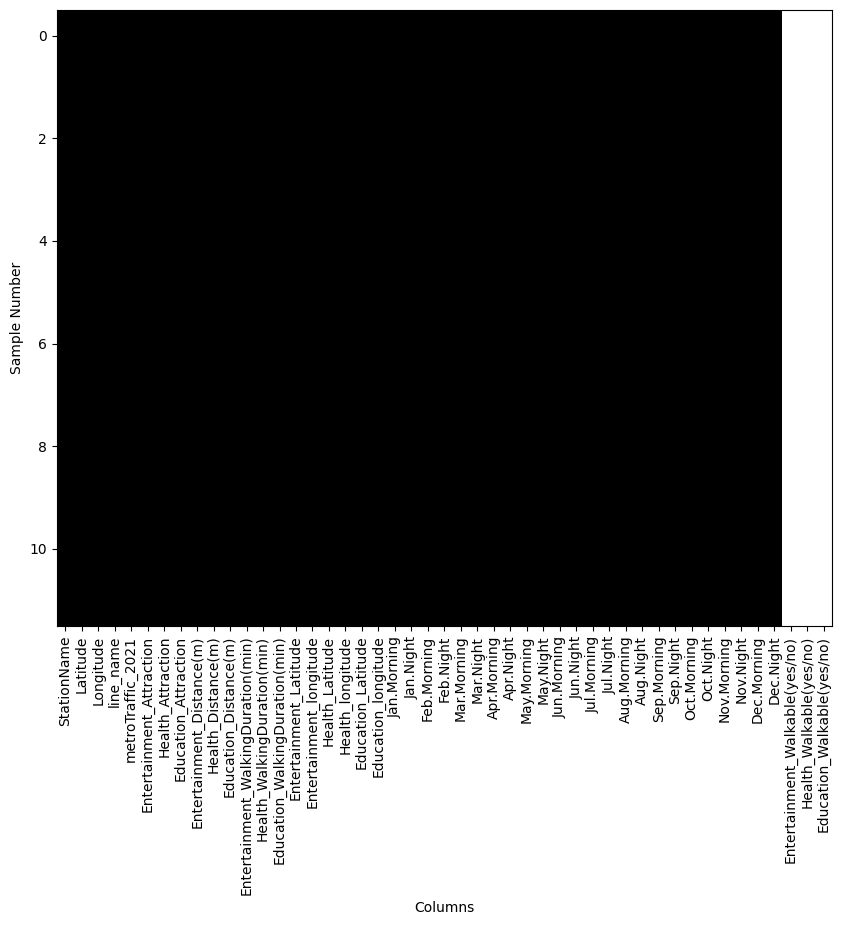

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(metro_dataset.isna(), aspect="auto", interpolation="nearest", cmap="gray")

# Set the x-tick labels to the column names
plt.xticks(ticks=range(len(metro_dataset.columns)), labels=metro_dataset.columns, rotation=90)

# Labeling the axes
plt.xlabel("Columns")
plt.ylabel("Sample Number")

# Display the plot
plt.show()

only the Entertainment Walkable(yes/no)
Health Walkable(yes/no)
Education Walkable(yes/no) coulumns are empty as we still didnt compute the values

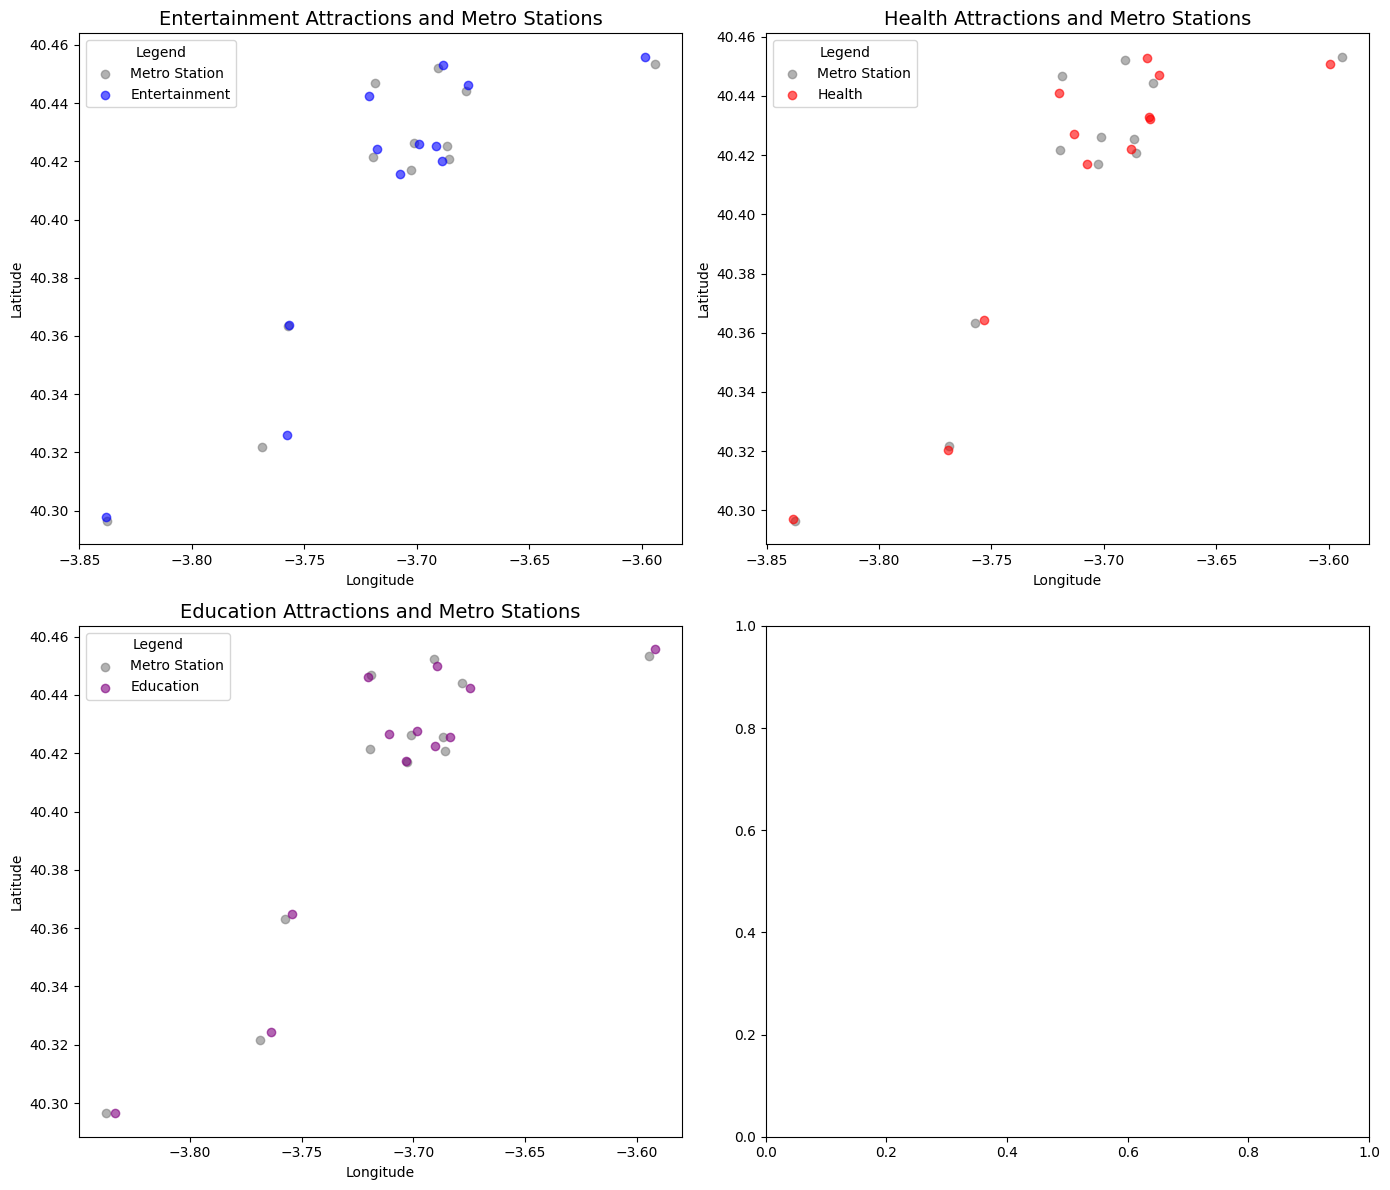

In [6]:
import matplotlib.pyplot as plt

# Define colors for each attraction type
attraction_colors = {
    "Entertainment": "blue",
    "Health": "red",
    "Education": "purple",
}

# Define the attraction columns for each type
attraction_columns = {
    "Entertainment": ["Entertainment_Attraction", "Entertainment_Latitude", "Entertainment_longitude"],
    "Health": ["Health_Attraction", "Health_Latitude", "Health_longitude"],
    "Education": ["Education_Attraction", "Education_Latitude", "Education_longitude"],
}

# Create the plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Create 3 subplots
axes = axes.flatten()  # Flatten axes array to easily access each subplot

# Loop through each attraction type and plot the corresponding scatter plot
for idx, (attraction_type, columns) in enumerate(attraction_columns.items()):
    ax = axes[idx]

    # Plot metro stations as red markers
    for _, row in metro_dataset.dropna(subset=['Latitude', 'Longitude']).iterrows():
        ax.scatter(row['Longitude'], row['Latitude'], c='grey', label='Metro Station' if _ == 0 else "", alpha=0.6)

    # Plot attractions as color-coded markers for each type
    for _, row in metro_dataset.dropna(subset=[columns[1], columns[2]]).iterrows():
        ax.scatter(row[columns[2]], row[columns[1]], c=attraction_colors[attraction_type],
                   label=attraction_type if _ == 0 else "", alpha=0.6)

    # Set title and labels
    ax.set_title(f"{attraction_type} Attractions and Metro Stations", fontsize=14)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # Add legend
    ax.legend(title="Legend", loc='upper left', fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

The visualization provides insights into the spatial distribution of three types of attractions (Entertainment, Health, and Education) in relation to metro stations.

# Entertainment Attractions:
Blue markers indicate the locations of entertainment attractions, while grey markers represent metro stations.
Entertainment attractions are somewhat dispersed but tend to cluster near metro stations, suggesting accessibility through public transportation.
# Health Attractions:
Red markers denote health-related attractions such as clinics or hospitals.
These attractions are clustered more tightly compared to entertainment, often aligning closely with metro stations, possibly indicating a focus on urban areas for healthcare facilities.
# Education Attractions:
Purple markers signify educational attractions like schools or libraries.
Educational facilities also display a clustering tendency, predominantly near metro stations, implying strategic placement for convenience.
# Overall Observation:
Across all attraction types, proximity to metro stations is a common pattern, highlighting the role of public transport in urban planning and accessibility.


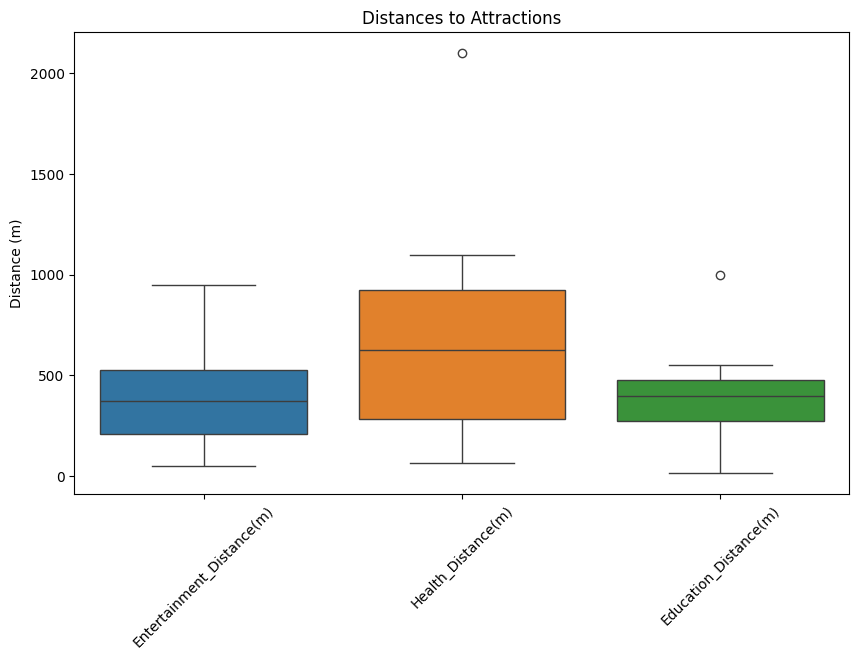

In [7]:
import seaborn as sns
# Display the visualization
# Boxplot for distances
distance_cols = ['Entertainment_Distance(m)', 'Health_Distance(m)',
                 'Education_Distance(m)',]

plt.figure(figsize=(10, 6))
sns.boxplot(data=metro_dataset[distance_cols])
plt.title('Distances to Attractions')
plt.ylabel('Distance (m)')
plt.xticks(rotation=45)
plt.show()

The boxplot visualizes the distances from metro stations to three types of attractions: Entertainment, Health, and Education.

# Entertainment Attractions:
Represented by the blue boxplot, these attractions have the smallest median distance from metro stations.
The interquartile range (IQR) is relatively narrow, suggesting consistent proximity to metro stations.
A few outliers indicate that some entertainment attractions are further away.
# Health Attractions:
The orange boxplot shows health attractions have the largest median distance among the three categories.
The IQR is wide, indicating greater variability in the distance of health-related facilities from metro stations.
Outliers further suggest some health attractions are located far from metro stations.
# Education Attractions:
Represented by the green boxplot, education attractions have a median distance slightly larger than entertainment but smaller than health facilities.
The narrow IQR indicates that most educational attractions are closely clustered near metro stations.
There are few or no significant outliers, indicating consistent proximity.
# Overall Observations:
Entertainment attractions tend to be the most accessible via metro stations, while health attractions are relatively less accessible on average.
The consistent clustering of education and entertainment attractions near metro stations highlights their strategic urban placement for accessibility.
Outliers in health and entertainment indicate that not all attractions are equally well-connected.

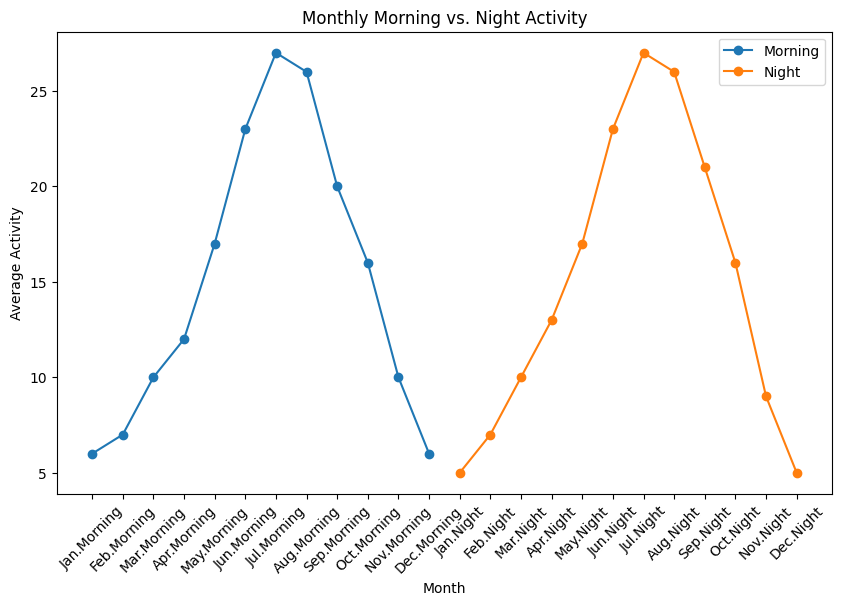

In [8]:
# Display the visualization
# Extract morning and night columns
morning_cols = [col for col in metro_dataset.columns if 'Morning' in col]
night_cols = [col for col in metro_dataset.columns if 'Night' in col]

# Calculate averages for plotting
morning_avg = metro_dataset[morning_cols].mean()
night_avg = metro_dataset[night_cols].mean()

# Line Chart
plt.figure(figsize=(10, 6))
plt.plot(morning_cols, morning_avg, label='Morning', marker='o')
plt.plot(night_cols, night_avg, label='Night', marker='o')
plt.title('Monthly Morning vs. Night Activity')
plt.xlabel('Month')
plt.ylabel('Average Activity')
plt.legend()
plt.xticks(rotation=45)
plt.show()


The line chart illustrates the average monthly activity for metro stations during the morning (blue line) and night (orange line).
# Morning Activity:
Morning activity peaks during the summer months, particularly in June and July.
It declines sharply from August through the winter months, with the lowest activity in December and January.
The trend suggests a seasonal variation, possibly tied to commuting patterns and tourist activity during summer.
# Night Activity:
Night activity shows a similar peak in June and July, indicating high engagement during the summer.
Like morning activity, it gradually decreases through August, reaching the lowest levels in December and January.
The overlap in peaks between morning and night activity could be attributed to summer events or extended operational hours during tourist-heavy periods.
# Overall Observations:
Both morning and night activities follow a comparable seasonal pattern, with the highest engagement in the summer and the lowest in winter.
The similar trends suggest a strong correlation between metro usage and seasonal behaviors, such as tourism or holiday schedules.

# adding walkbility coulumn for entertainment,education,health

This code evaluates the walkability of entertainment attractions near metro stations based on specific criteria: the distance to the attraction (≤2000m), walking duration (≤25 minutes), and average temperature (<30°C). It calculates the average temperature across monthly data for each station, applies a function to assess whether the attraction is walkable, and stores the result in a new column . Finally, it displays relevant columns to summarize the evaluation. The goal is to analyze urban accessibility and walking feasibility under practical conditions.

In [9]:

# Calculate the average temperature across all monthly columns
monthly_columns = [col for col in metro_dataset.columns if 'Morning' in col or 'Night' in col]
metro_dataset['Avg_Temperature'] = metro_dataset[monthly_columns].mean(axis=1)

# Define a function to evaluate walkability specifically for Entertainment
def evaluate_entertainment_walkability(row):
    if row['Entertainment_Distance(m)'] <= 2000:  # Main criterion
        if row['Entertainment_WalkingDuration(min)'] <= 25 and row['Avg_Temperature'] < 30:
            return 'Yes'
    return 'No'

# Apply the criteria specifically to the Entertainment_Walkable(yes/no) column
metro_dataset['Entertainment_Walkable(yes/no)'] = metro_dataset.apply(evaluate_entertainment_walkability, axis=1)

# Display the updated DataFrame with the modified Entertainment_Walkable(yes/no) column
metro_dataset[['StationName', 'Entertainment_Distance(m)', 'Entertainment_WalkingDuration(min)', 'Avg_Temperature', 'Entertainment_Walkable(yes/no)']]

,StationName,Entertainment_Distance(m),Entertainment_WalkingDuration(min),Avg_Temperature,Entertainment_Walkable(yes/no)
0,Tribunal,350,4,14.958333,Yes
1,Retiro,120,4,14.958333,Yes
2,Sol,400,5,14.958333,Yes
3,Serrano,450,6,14.958333,Yes
4,El capricho,700,10,14.958333,Yes
5,Príncipe Pío,600,10,14.958333,Yes
6,Vicente Aleixandre,500,7,14.958333,Yes
7,Cruz del Rayo,50,1,14.958333,Yes
8,Santiago Bernabéu,200,3,14.958333,Yes
9,La Peseta,210,3,14.958333,Yes


In [10]:

# Calculate the average temperature across all monthly columns
monthly_columns = [col for col in metro_dataset.columns if 'Morning' in col or 'Night' in col]
metro_dataset['Avg_Temperature'] = metro_dataset[monthly_columns].mean(axis=1)

# Define a function to evaluate walkability specifically for Health
def evaluate_Health_walkability(row):
    if row['Health_Distance(m)'] <= 2000:  # Main criterion
        if row['Health_WalkingDuration(min)'] <= 25 and row['Avg_Temperature'] < 30:
            return 'Yes'
    return 'No'

# Apply the criteria specifically to the Health_Walkable(yes/no) column
metro_dataset['Health_Walkable(yes/no)'] = metro_dataset.apply(evaluate_Health_walkability, axis=1)

# Display the updated DataFrame with the modified Health_Walkable(yes/no) column
metro_dataset[['StationName', 'Health_Distance(m)', 'Health_WalkingDuration(min)', 'Avg_Temperature', 'Health_Walkable(yes/no)']]

,StationName,Health_Distance(m),Health_WalkingDuration(min),Avg_Temperature,Health_Walkable(yes/no)
0,Tribunal,2100,31,14.958333,No
1,Retiro,270,3,14.958333,Yes
2,Sol,300,4,14.958333,Yes
3,Serrano,1100,17,14.958333,Yes
4,El capricho,600,9,14.958333,Yes
5,Príncipe Pío,1000,15,14.958333,Yes
6,Vicente Aleixandre,650,9,14.958333,Yes
7,Cruz del Rayo,290,4,14.958333,Yes
8,Santiago Bernabéu,900,14,14.958333,Yes
9,La Peseta,650,9,14.958333,Yes


In [11]:

# Calculate the average temperature across all monthly columns
monthly_columns = [col for col in metro_dataset.columns if 'Morning' in col or 'Night' in col]
metro_dataset['Avg_Temperature'] = metro_dataset[monthly_columns].mean(axis=1)

# Define a function to evaluate walkability specifically for Education
def evaluate_Education_walkability(row):
    if row['Education_Distance(m)'] <= 2000:  # Main criterion
        if row['Education_WalkingDuration(min)'] <= 25 and row['Avg_Temperature'] < 30:
            return 'Yes'
    return 'No'

# Apply the criteria specifically to the Education_Walkable(yes/no) column
metro_dataset['Education_Walkable(yes/no)'] = metro_dataset.apply(evaluate_Education_walkability, axis=1)

# Display the updated DataFrame with the modified Education_Walkable(yes/no) column
metro_dataset[['StationName', 'Education_Distance(m)', 'Education_WalkingDuration(min)', 'Avg_Temperature', 'Education_Walkable(yes/no)']]

,StationName,Education_Distance(m),Education_WalkingDuration(min),Avg_Temperature,Education_Walkable(yes/no)
0,Tribunal,300,4,14.958333,Yes
1,Retiro,450,6,14.958333,Yes
2,Sol,14,1,14.958333,Yes
3,Serrano,200,3,14.958333,Yes
4,El capricho,400,5,14.958333,Yes
5,Príncipe Pío,1000,17,14.958333,Yes
6,Vicente Aleixandre,96,1,14.958333,Yes
7,Cruz del Rayo,550,8,14.958333,Yes
8,Santiago Bernabéu,450,6,14.958333,Yes
9,La Peseta,400,6,14.958333,Yes



Walkability Analysis Results:
     Entertainment_Walkable(yes/no)  Health_Walkable(yes/no)  \
No                              NaN                        1   
Yes                            12.0                       11   

     Education_Walkable(yes/no)  
No                          NaN  
Yes                        12.0  


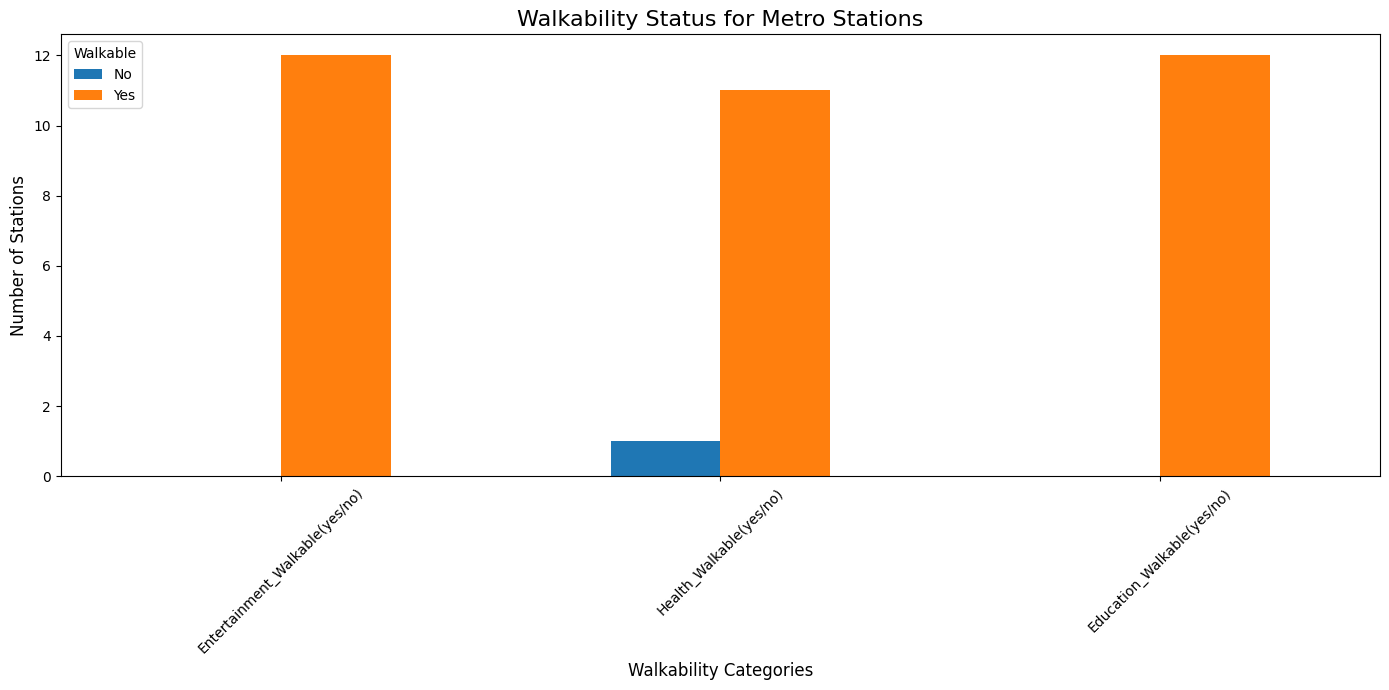

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming metro_dataset is already loaded and walkability_columns are defined

# Define walkability columns
walkability_columns = [
    "Entertainment_Walkable(yes/no)",
    "Health_Walkable(yes/no)",
    "Education_Walkable(yes/no)",
]

# Calculate the value counts for each walkability column
walkability_df = metro_dataset[walkability_columns].apply(lambda x: x.value_counts())

# Print the value counts for better visualization
print("\nWalkability Analysis Results:")
print(walkability_df)

# Plotting the value counts for each walkability category
walkability_df.T.plot(kind='bar', figsize=(14, 7), color=['#1f77b4', '#ff7f0e'])

# Adding titles and labels
plt.title('Walkability Status for Metro Stations', fontsize=16)
plt.ylabel('Number of Stations', fontsize=12)
plt.xlabel('Walkability Categories', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Walkable', loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Walkability Data:
The table output displays the number of metro stations categorized as walkable (Yes) or not walkable (No) for each walkability category:
For Entertainment Walkability, all the values are NaN, indicating there is no data recorded for this category.
For Health Walkability, there is 1 station marked as not walkable (No) and 11 stations marked as walkable (Yes).
For Education Walkability, all 12 stations are marked as walkable (Yes).
# Bar Plot:
The bar chart visualizes the count of metro stations for each category:
Entertainment Walkability all 12 stations are marked as walkable (Yes).
Both Health Walkability and Education Walkability have dominant Yes bars, indicating that most metro stations are within a walkable range for these categories.
There is a minor No bar for Health Walkability, highlighting the one non-walkable station.

# visualizing the metro stations and different attrctions with  radius on map


first we will set the raduis to 2000m , as done in riyadh and dubai maps .

In [13]:
import folium

# Define the coverage radius (2000m = 2 km) for metro stations
coverage_radius = 2000  # in meters

# Define colors for each attraction type
attraction_colors = {
    "Entertainment": "blue",
    "Health": "pink",
    "Education": "purple",
}

# Attraction columns for each type
attraction_columns = {
    "Entertainment": ["Entertainment_Attraction", "Entertainment_Latitude", "Entertainment_longitude"],
    "Health": ["Health_Attraction", "Health_Latitude", "Health_longitude"],
    "Education": ["Education_Attraction", "Education_Latitude", "Education_longitude"],
}

# Function to generate the map with layer control
def generate_map_with_layers():
    # Create the map centered on mdrid
    m = folium.Map(location=[40.4167, -3.7033], zoom_start=12)

    # Add metro stations as red markers with coverage circles
    for _, row in metro_dataset.dropna(subset=['Latitude', 'Longitude']).iterrows():
        station_coords = [row['Latitude'], row['Longitude']]
        folium.Marker(
            location=station_coords,
            popup=row['StationName'],  # Popup shows the metro station name
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(m)

        # Add coverage circle around metro station
        folium.Circle(
            location=station_coords,
            radius=coverage_radius,
            color='Grey',
            fill=True,
            fill_opacity=0.2
        ).add_to(m)

    # Loop through attraction types to add them as separate layers
    for attraction_type, columns in attraction_columns.items():
        attraction_layer = folium.FeatureGroup(name=attraction_type)  # Create a new layer for each type

        # Add attractions as color-coded markers for the specified type
        for _, row in metro_dataset.dropna(subset=[columns[1], columns[2]]).iterrows():
            attraction_coords = [row[columns[1]], row[columns[2]]]
            attraction_name = row[columns[0]]

            folium.Marker(
                location=attraction_coords,
                popup=attraction_name,  # Popup shows the attraction's name
                icon=folium.Icon(color=attraction_colors[attraction_type], icon='info-sign')
            ).add_to(attraction_layer)  # Add the marker to the layer

        # Add the layer to the map
        attraction_layer.add_to(m)

    # Add layer control to allow toggling between different attraction types
    folium.LayerControl().add_to(m)

    # Save the map as an HTML file
    map_file_path = "metro_map_with_slicer.html"
    m.save(map_file_path)

    return map_file_path

# Generate the map with layers for attraction types
map_path = generate_map_with_layers()

map_path  # Return the file path for the generated map

'metro_map_with_slicer.html'

**we see that the radius is too large and causes overlapping , *so how do we know wht radius to set ?*
we will compute the mean of all the distance columns to see if the atrctions are within the mean distnce radius of the station or not**

In [14]:
import pandas as pd #calc mean of ll the distnces


# List of the distance columns
distance_columns = ['Entertainment_Distance(m)', 'Health_Distance(m)', 'Education_Distance(m)']


# Combine all distances into one series and calculate the overall average
all_distances = metro_dataset[distance_columns].stack()  # Stack all distance columns into a single series
overall_average_distance = all_distances.mean()

# Display the overall average
print(f"Overall average distance: {overall_average_distance:.2f} meters")



Overall average distance: 487.44 meters


now we formulte the same map with updated radius

In [15]:
import folium

#now we updte the rdius with our new men

# Define the coverage radius (487 = 0.487 km) for metro stations
coverage_radius = 487  # in meters


# Define colors for each attraction type
attraction_colors = {
    "Entertainment": "blue",
    "Health": "pink",
    "Education": "purple",
}

# Attraction columns for each type
attraction_columns = {
    "Entertainment": ["Entertainment_Attraction", "Entertainment_Latitude", "Entertainment_longitude"],
    "Health": ["Health_Attraction", "Health_Latitude", "Health_longitude"],
    "Education": ["Education_Attraction", "Education_Latitude", "Education_longitude"],
}

# Function to generate the map with layer control
def generate_map_with_layers():
    # Create the map centered on mdrid
    m = folium.Map(location=[40.4167, -3.7033], zoom_start=12)

    # Add metro stations as red markers with coverage circles
    for _, row in metro_dataset.dropna(subset=['Latitude', 'Longitude']).iterrows():
        station_coords = [row['Latitude'], row['Longitude']]
        folium.Marker(
            location=station_coords,
            popup=row['StationName'],  # Popup shows the metro station name
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(m)

        # Add coverage circle around metro station
        folium.Circle(
            location=station_coords,
            radius=coverage_radius,
            color='Grey',
            fill=True,
            fill_opacity=0.2
        ).add_to(m)

    # Loop through attraction types to add them as separate layers
    for attraction_type, columns in attraction_columns.items():
        attraction_layer = folium.FeatureGroup(name=attraction_type)  # Create a new layer for each type

        # Add attractions as color-coded markers for the specified type
        for _, row in metro_dataset.dropna(subset=[columns[1], columns[2]]).iterrows():
            attraction_coords = [row[columns[1]], row[columns[2]]]
            attraction_name = row[columns[0]]

            folium.Marker(
                location=attraction_coords,
                popup=attraction_name,  # Popup shows the attraction's name
                icon=folium.Icon(color=attraction_colors[attraction_type], icon='info-sign')
            ).add_to(attraction_layer)  # Add the marker to the layer

        # Add the layer to the map
        attraction_layer.add_to(m)

    # Add layer control to allow toggling between different attraction types
    folium.LayerControl().add_to(m)

    # Save the map as an HTML file
    map_file_path = "metro_map_with_slicer2.html"
    m.save(map_file_path)

    return map_file_path

# Generate the map with layers for attraction types
map_path = generate_map_with_layers()

map_path  # Return the file path for the generated map

'metro_map_with_slicer2.html'

we see that most attractions are within the mean distnce radius of the station which implies that the city's public transportation system is well-integrated with its urban infrastructure. This suggests:

# Accessibility:
 The metro system is strategically planned to connect key areas of the city, ensuring that entertainment, health, and educational facilities are easily accessible to the public.
# Convenience:
The proximity of attractions reduces reliance on additional transportation, making it more convenient for residents and tourists to reach important destinations.
# Urban Planning:
This reflects thoughtful urban planning that aligns metro station locations with areas of high utility, contributing to an efficient and user-friendly public transit system.
# Sustainability:
 By reducing the need for private vehicles to access major attractions, the metro supports eco-friendly and sustainable transportation.
# Overall
 it highlights Madrid's commitment to integrating public transit with essential urban services, promoting connectivity and reducing travel time for city dwellers.

# plottig traffic on stations on map

In [16]:
import pandas as pd
import folium

# Metro data
metro_data = pd.DataFrame({
    'StationName': [
        'Tribunal', 'Retiro', 'Sol', 'Serrano', 'El capricho',
        'Príncipe Pío', 'Vicente Aleixandre', 'Cruz del Rayo',
        'Santiago Bernabéu', 'La Peseta', 'Loranca', 'Hospital Severo Ochoa'
    ],
    'Latitude': [
        40.42613342, 40.42073689, 40.41686834, 40.42541243,
        40.45329665, 40.4215879, 40.44684253, 40.44423272,
        40.45216092, 40.36325224, 40.29642607, 40.32178703
    ],
    'Longitude': [
        -3.70116243, -3.685877351, -3.702793213, -3.686606943,
        -3.594265832, -3.71940932, -3.718782881, -3.678233756,
        -3.690702584, -3.757339835, -3.837545586, -3.768687361
    ],
    'metroTraffic_2021': [
        13521895, 3612177, 49567085, 3148887, 943938,
        32191729, 2139036, 1676629, 4784869, 1314439,
        1831020, 1277841
    ]
})

# Normalize metroTraffic_2021 to get a scale for color intensity
traffic_max = metro_data['metroTraffic_2021'].max()  # Max traffic value
traffic_min = metro_data['metroTraffic_2021'].min()  # Min traffic value

# Function to determine color intensity based on traffic (monochromatic red scale)
def get_color_by_traffic(traffic):
    # Normalize the traffic to a range between 0 and 1
    normalized_traffic = (traffic - traffic_min) / (traffic_max - traffic_min)

    # Generate red color intensity based on normalized traffic value
    r = int(255 * normalized_traffic)  # Red component (light to dark)
    g = 0  # No green component for a red scale
    b = 0  # No blue component for a red scale

    return f'#{r:02x}{g:02x}{b:02x}'  # Return hex color

# Step 1: Create a folium map
m = folium.Map(location=[40.4167, -3.70325], zoom_start=12)  # Centered in Madrid

# Step 2: Add all stations as CircleMarkers with color intensity based on traffic
for _, row in metro_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=8,  # Adjust marker size
        popup=f"{row['StationName']}<br>Traffic: {row['metroTraffic_2021']:,}",
        color=get_color_by_traffic(row['metroTraffic_2021']),
        fill=True,
        fill_color=get_color_by_traffic(row['metroTraffic_2021']),
        fill_opacity=0.7
    ).add_to(m)

# Step 3: Display the map directly (for Jupyter, IPython, or interactive environments)
m


the legend :

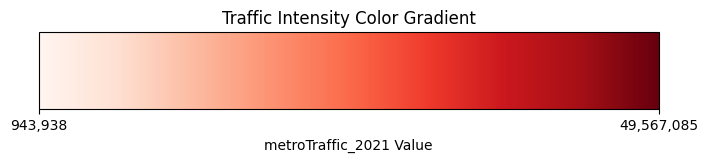

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Metro data
metro_data = {
    'StationName': [
        'Tribunal', 'Retiro', 'Sol', 'Serrano', 'El capricho',
        'Príncipe Pío', 'Vicente Aleixandre', 'Cruz del Rayo',
        'Santiago Bernabéu', 'La Peseta', 'Loranca', 'Hospital Severo Ochoa'
    ],
    'metroTraffic_2021': [
        13521895, 3612177, 49567085, 3148887, 943938,
        32191729, 2139036, 1676629, 4784869, 1314439,
        1831020, 1277841
    ]
}

# Step 1: Normalize metroTraffic_2021 to create the color gradient
traffic_min = min(metro_data['metroTraffic_2021'])
traffic_max = max(metro_data['metroTraffic_2021'])

# Normalize traffic data
norm = mcolors.Normalize(vmin=traffic_min, vmax=traffic_max)

# Create a red color gradient using the normalized traffic values
cmap = plt.cm.Reds

# Step 2: Create a color gradient
fig, ax = plt.subplots(figsize=(8, 1))
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), cax=ax, orientation='horizontal')

# Step 3: Set the title and labels
cbar.set_label('metroTraffic_2021 Value')
cbar.set_ticks([traffic_min, traffic_max])  # Min and Max traffic values
cbar.set_ticklabels([f'{traffic_min:,}', f'{traffic_max:,}'])  # Format the tick labels

# Step 4: Show the color gradient
plt.title("Traffic Intensity Color Gradient")
plt.show()


The map provides a visual representation of Madrid's metro stations, where the intensity of the color gradient (from light red to dark red) correlates with the metro traffic volume in 2021.

# Color Gradient:
Stations with higher traffic volumes are represented by darker red markers (more intense shades).
Stations with lower traffic volumes are shown with lighter red markers.
# Interpretation of Traffic Patterns:
Stations with the darkest red (like Sol and Príncipe Pío) are key hubs in the metro system, handling a significant volume of passengers due to their central location, connectivity, or proximity to major attractions.
Stations with lighter red (e.g., El Capricho and La Peseta) likely serve suburban or less densely populated areas with lower passenger numbers.
# Significance:
The color gradient highlights the effectiveness of the metro system in managing traffic distribution. Central stations are vital to the network, and their high traffic levels suggest they are major transfer or destination points.
Lower traffic volumes at some stations may point to underutilized infrastructure, potentially due to less demand or geographic factors.
By visualizing this data on a map, planners can identify bottlenecks, optimize resources, or target areas for future development or improvement.

# comparison of acsessbility of similar atrrctions between the metro and bus stations

***what station is closer to my attrction? the metro or the bus ? we will see now***

first we will find the similar attrctions in both of our datasets. **they are 5**

In [19]:
import pandas as pd
file_path = '/content/MadridBus_structured_data.csv'
bus_data= pd.read_csv(file_path)

# Metro dataset (only relevant attractions for matching)
metro_data = {
    'Entertainment_Attraction': [
        'Museo del Romanticismo', 'Puerta de Alcalá', 'Plaza Mayor', 'Museo de Cera',
        'Jardín El Capricho de la Alameda de Osuna', 'Temple of Debod', 'Jaime del Amo Park',
        'National Music Auditorium', 'Santiago Bernabéu Stadium', 'Salvador Allende Park',
        'Holy Family Parish', 'Leganés Sculpture Museum'
    ],
    'Health_Attraction': [
        'Hospital Nuestra Señora del Rosario', 'Angloamericana Medical Unit', 'Clinícas Pol',
        'Hospital Nuestra Señora del Rosario', 'Clínica Suiza', 'Clínica Santamarta',
        'Hospital Clinico Universitario San Carlos', 'Clínica Dental Auditorio', 'San Rafael Hospital',
        'Groen Physiotherapy and Rehabilitation', 'Clínica Dental Vitaldent', 'Hospital Universitario Severo Ochoa'
    ],
    'Education_Attraction': [
        'Wild Code School', 'Midleton School Madrid', 'Spanish Language School in Madrid',
        'Hispania Schools', 'Colegio Alameda de Osuna', 'Academy don Quijote', 'EOI Business School',
        'Madrid Flower School', 'FED Business School', 'Cinco Lobitos Infant School',
        'Public school Fregacedos', 'Albert\'s English School'
    ]
}

# Bus dataset
bus_data = {
    'attraction_by_bus': [
        'Plaza Mayor', 'Plaza Mayor', 'Plaza Mayor', 'Puerta de Alcalá', 'Plaza Mayor',
        'Museo del Romanticismo', 'Plaza Mayor', 'Pl. del Callao', 'Dirección General de Tráfico (DGT)',
        'Museo del Romanticismo', 'Car Rental Madrid - Atocha - Train Station', 'Pl. Elíptica',
        'Jardín El Capricho de la Alameda de Osuna', 'Museo de Cera', 'Jardín El Capricho de la Alameda de Osuna'
    ]
}

# Convert both datasets into pandas DataFrames
metro_df = pd.DataFrame(metro_data)
bus_df = pd.DataFrame(bus_data)

# Extract unique attraction names from both metro and bus datasets
metro_attractions = set(metro_df['Entertainment_Attraction'].unique())  # Using only Entertainment Attractions
bus_attractions = set(bus_df['attraction_by_bus'].unique())

# Find common attractions between metro and bus datasets
common_attractions = metro_attractions.intersection(bus_attractions)

# Display the common attractions
print("Common Attractions in Metro and Bus Datasets:")
for attraction in common_attractions:
    print(attraction)


Common Attractions in Metro and Bus Datasets:
Museo de Cera
Museo del Romanticismo
Puerta de Alcalá
Jardín El Capricho de la Alameda de Osuna
Plaza Mayor


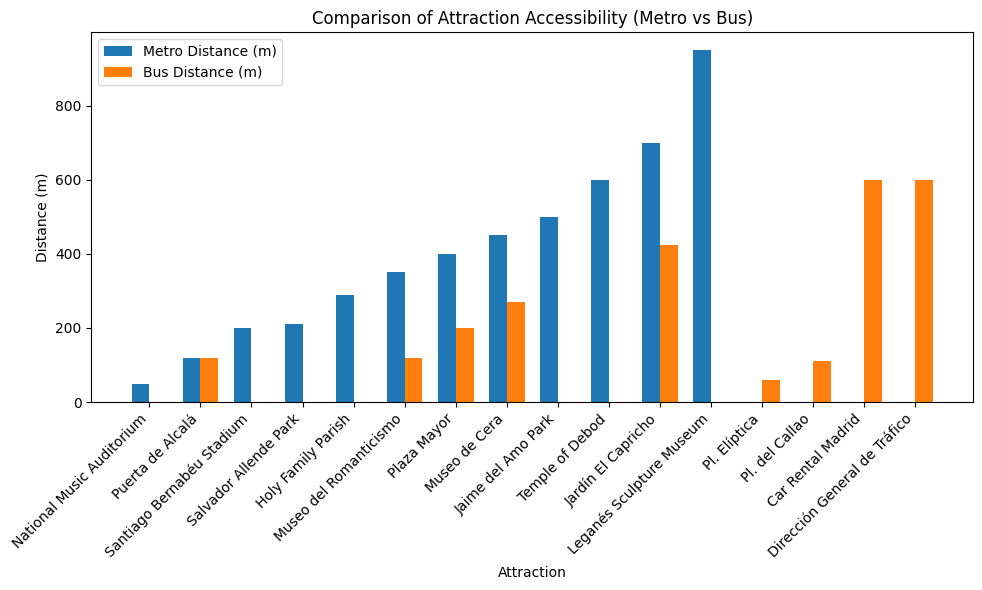

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Updated Metro dataset with Entertainment, Health, and Education attractions
metro_data = {
    'StationName': [
        'Tribunal', 'Retiro', 'Sol', 'Serrano', 'El capricho',
        'Príncipe Pío', 'Vicente Aleixandre', 'Cruz del Rayo',
        'Santiago Bernabéu', 'La Peseta', 'Loranca', 'Hospital Severo Ochoa'
    ],
    'Entertainment_Attraction': [
        'Museo del Romanticismo', 'Puerta de Alcalá', 'Plaza Mayor', 'Museo de Cera',
        'Jardín El Capricho', 'Temple of Debod', 'Jaime del Amo Park',
        'National Music Auditorium', 'Santiago Bernabéu Stadium', 'Salvador Allende Park',
        'Holy Family Parish', 'Leganés Sculpture Museum'
    ],
    'Health_Attraction': [
        'Hospital Nuestra Señora del Rosario', 'Angloamericana Medical Unit', 'Clinícas Pol',
        'Hospital Nuestra Señora del Rosario', 'Clínica Suiza', 'Clínica Santamarta',
        'Hospital Clinico Universitario San Carlos', 'Clínica Dental Auditorio', 'San Rafael Hospital',
        'Groen Physiotherapy and Rehabilitation', 'Clínica Dental Vitaldent',
        'Hospital Universitario Severo Ochoa'
    ],
    'Education_Attraction': [
        'Wild Code School', 'Midleton School Madrid', 'Spanish Language School in Madrid',
        'Hispania Schools', 'Colegio Alameda de Osuna', 'Academy don Quijote',
        'EOI Business School', 'Madrid Flower School', 'FED Business School',
        'Cinco Lobitos Infant School', 'Public school Fregacedos', 'Albert\'s English School'
    ],
    'Entertainment_Distance(m)': [
        350, 120, 400, 450, 700, 600, 500, 50, 200, 210, 290, 950
    ]
}

# Updated Bus dataset
bus_data = {
    'route_Name': [
        'PLAZA MAYOR - COLONIA PARQUE DE EUROPA', 'PLAZA MAYOR - VILLAVERDE CRUCE',
        'PLAZA MAYOR - VILLAVERDE CRUCE', 'PUERTA DE ALCALA - BARRIO DE CANILLEJAS',
        'PLAZA MAYOR - ALUCHE', 'TRIBUNAL - ALFONSO XIII', 'PLAZA MAYOR - AVENIDA DEL MANZANARES',
        'PLAZA DEL CALLAO - COLONIA MANZANARES', 'AVENIDA DE AMERICA - BARRIO DEL AEROPUERTO',
        'TRIBUNAL - PLAZA DE CASTILLA', 'ESTACION DE ATOCHA - MONCLOA', 'PLAZA ELIPTICA - CEMENTERIO SUR',
        'ALAMEDA DE OSUNA - CANILLEJAS', 'ATOCHA RENFE - RECOLETOS', 'ALAMEDA DE OSUNA - TORRE ARIAS'
    ],
    'attraction_by_bus': [
        'Plaza Mayor', 'Plaza Mayor', 'Plaza Mayor', 'Puerta de Alcalá', 'Plaza Mayor',
        'Museo del Romanticismo', 'Plaza Mayor', 'Pl. del Callao', 'Dirección General de Tráfico',
        'Museo del Romanticismo', 'Car Rental Madrid', 'Pl. Elíptica', 'Jardín El Capricho', 'Museo de Cera',
        'Jardín El Capricho'
    ],
    'distance(m)': [
        17, 280, 350, 120, 110, 120, 240, 110, 600, 120, 600, 60, 400, 270, 450
    ]
}

# Convert both datasets into pandas DataFrames
metro_df = pd.DataFrame(metro_data)
bus_df = pd.DataFrame(bus_data)

# Group by attraction and calculate the average distance for both metro and bus
metro_avg_dist = metro_df.groupby('Entertainment_Attraction')['Entertainment_Distance(m)'].mean()
bus_avg_dist = bus_df.groupby('attraction_by_bus')['distance(m)'].mean()

# Merge the two dataframes on the attraction names (with outer join to include all attractions)
merged_data = pd.merge(metro_avg_dist, bus_avg_dist, left_index=True, right_index=True, how='outer')

# Rename columns for clarity
merged_data.columns = ['Metro_Distance', 'Bus_Distance']

# Sort by distance to make the comparison easier to interpret
merged_data = merged_data.sort_values(by=['Metro_Distance', 'Bus_Distance'])

# Create a bar chart comparing the distances for metro and bus
fig, ax = plt.subplots(figsize=(10, 6))

# Set positions for the bars
bar_width = 0.35
index = np.arange(len(merged_data))

# Plot bars for metro and bus
ax.bar(index, merged_data['Metro_Distance'], bar_width, label='Metro Distance (m)', color='tab:blue')
ax.bar(index + bar_width, merged_data['Bus_Distance'], bar_width, label='Bus Distance (m)', color='tab:orange')

# Add labels and title
ax.set_xlabel('Attraction')
ax.set_ylabel('Distance (m)')
ax.set_title('Comparison of Attraction Accessibility (Metro vs Bus)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(merged_data.index, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()



# Overall Trend:
For most attractions, the bus system offers closer proximity compared to the metro. This is indicated by the shorter orange bars in many cases.
The metro system, while generally farther from attractions, connects key locations efficiently due to its centralized nature.
# Closer Option:
For each attraction, the station closer (metro or bus) is determined by comparing the distances:

If the blue bar (metro distance) is shorter, the metro is closer.
If the orange bar (bus distance) is shorter, the bus is closer.

# Metro Stations Closer:
Museo del Romanticismo: The metro station provides a closer option than the bus.
Plaza Mayor: Similar proximity for metro and bus, but the metro is slightly farther.
Museum: The metro has a significantly shorter distance compared to the bus.
Bus Stations Closer:
Pl. Elíptica, Pl. del Callao, and Dirección General de Tráfico are notably closer to bus routes.
Jardín El Capricho: The bus offers better accessibility.
# Insights:
The metro is more advantageous for centralized or large attractions.
The bus network caters to specific, localized destinations.
